In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utilities

In [2]:
sales = pd.read_csv('nw6_data_price_fut_years_prediction.csv', index_col=0)
#sales = sales.drop(['attributes'], axis = 1)

# The current renting data is segmented by beds until 3 and then is 4 or more. 
# We need to adjust the selling data for that
#sales = sales[sales['beds']<5]
sales.loc[sales['beds']>=4,'beds'] = 4

In [3]:
rents = pd.read_csv('nw6_data_rent_prev_years_prediction.csv', index_col=0).rename(columns={'price': 'rent'})
rents_agg = rents.groupby(['beds', 'year'])['rent'].mean().reset_index()

#sell_data = sell_data.groupby(['beds','year'])['price'].mean().reset_index()

#full_data =  sales.merge(rents, on=['beds', 'year'])
full_data =  sales.merge(rents_agg, on=['beds', 'year'])

full_data['yield'] = full_data['rent']*12/full_data['price']*100
full_data['type'] = full_data['attributes'].str.split(',').str[0]

full_data_s = full_data.drop(['date_x', 'date_y', 'baths', 'reception', 'href'],1, errors='ignore')
full_data_s = full_data_s.dropna()


In [4]:
full_data

,address,attributes,postcode,beds,real_price,date,real_year,year,price,rent,yield,type
0,"Flat 4, Elstow Grange 40-42, Brondesbury Park","Flat, Freehold, 3 Beds, 1 Bath, 1 Recep",NW6-7DW,3,140000,1998-11-01,1998,2012,524440.601775,2243.305309,5.133024,Flat
1,"1, Broadhurst Mansions, 97 Broadhurst Gardens","Flat, Share of freehold, 3 Beds, 2 Baths, 1 Recep",NW6-3QP,3,197500,1998-06-01,1998,2012,739835.848933,2243.305309,3.638600,Flat
2,"Ground And First Floor Flat, 24 Greencroft Gar...","Maisonette, Share of freehold, 3 Beds, 2 Baths...",NW6-3LS,3,265000,1998-02-01,1998,2012,992691.139075,2243.305309,2.711786,Maisonette
3,36 West End Lane,"Flat, Leasehold, 3 Beds, 1 Bath, 1 Recep",NW6-4PA,3,139999,1998-08-01,1998,2012,524436.855771,2243.305309,5.133061,Flat
4,44 Donaldson Road,"Flat, Share of freehold, 3 Beds, 3 Baths, 2 Re...",NW6-6NG,3,110000,1998-04-01,1998,2012,412060.472823,2243.305309,6.532940,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...
106811,"Flat 113, Hillsborough Court, Mortimer Crescent","Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-5NT,1,270000,2016-01-01,2016,2019,271399.104939,1722.692308,7.616940,Flat
106812,26 Queensgate Place,"Flat, 1 Bed, 1 Bath",NW6-4JS,1,292500,2016-02-01,2016,2019,294015.697017,1722.692308,7.031022,Flat
106813,1a Maygrove Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2EE,1,450000,2016-02-01,2016,2019,452331.841565,1722.692308,4.570164,Flat
106814,"Flat 5, Casterbridge, Abbey Road","Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-4DP,1,265000,2016-08-01,2016,2019,266373.195588,1722.692308,7.760656,Flat


In [5]:
full_data_s = full_data_s.drop_duplicates()
full_data_s = full_data_s.dropna()

/home/angel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


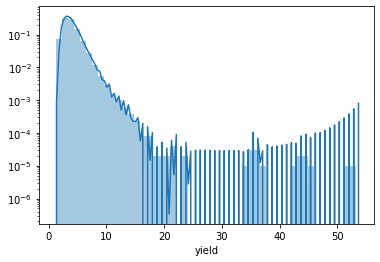

In [6]:
sns.distplot(full_data_s['yield'],hist_kws={'log':True})
plt.show()

Considering that a yield lower than 1% or greater than 7% can be considered an outlier, we have some of them in the data. THus, we will take them out.

In [7]:
#full_data_s = full_data_s[(full_data_s['yield']>1)&(full_data_s['yield']<7)]
full_data_s = full_data_s.drop_duplicates()

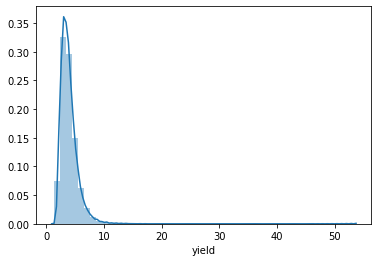

In [8]:
sns.distplot(full_data_s['yield'])

Now we have a (almost) normal distribution.

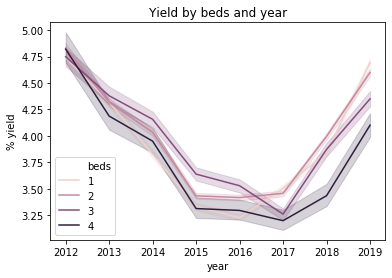

In [9]:
sns.lineplot(y='yield', x='year', data=full_data_s, hue='beds')
plt.title('Yield by beds and year')
plt.ylabel('% yield')
plt.show()

In [10]:
full_data_s.head()

,address,attributes,postcode,beds,real_price,date,real_year,year,price,rent,yield,type
0,"Flat 4, Elstow Grange 40-42, Brondesbury Park","Flat, Freehold, 3 Beds, 1 Bath, 1 Recep",NW6-7DW,3,140000,1998-11-01,1998,2012,524440.601775,2243.305309,5.133024,Flat
1,"1, Broadhurst Mansions, 97 Broadhurst Gardens","Flat, Share of freehold, 3 Beds, 2 Baths, 1 Recep",NW6-3QP,3,197500,1998-06-01,1998,2012,739835.848933,2243.305309,3.638600,Flat
2,"Ground And First Floor Flat, 24 Greencroft Gar...","Maisonette, Share of freehold, 3 Beds, 2 Baths...",NW6-3LS,3,265000,1998-02-01,1998,2012,992691.139075,2243.305309,2.711786,Maisonette
3,36 West End Lane,"Flat, Leasehold, 3 Beds, 1 Bath, 1 Recep",NW6-4PA,3,139999,1998-08-01,1998,2012,524436.855771,2243.305309,5.133061,Flat
4,44 Donaldson Road,"Flat, Share of freehold, 3 Beds, 3 Baths, 2 Re...",NW6-6NG,3,110000,1998-04-01,1998,2012,412060.472823,2243.305309,6.532940,Flat


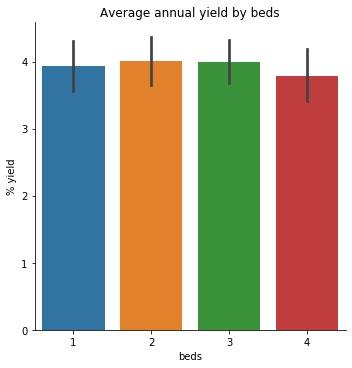

In [11]:
sns.catplot(data=full_data_s.groupby(['beds', 'year'])['yield'].mean().reset_index(), y='yield', x='beds',  kind="bar")
plt.title('Average annual yield by beds')
plt.ylabel('% yield')
plt.show()

In [12]:
full_data_s['postcode_zone'] = full_data_s['postcode'].str[4:5]

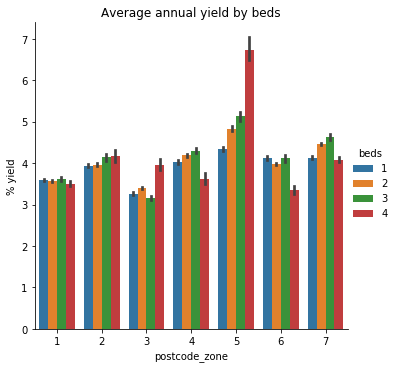

In [13]:
sns.catplot(data=full_data_s, y='yield', x='postcode_zone', hue='beds' ,kind="bar")
plt.title('Average annual yield by beds')
plt.ylabel('% yield')
plt.show()

In [14]:
full_data_s_no = utilities.remove_multidim_outliers(full_data_s, ['beds', 'year', 'postcode_zone'], 'yield', 1.5)
full_data_s_no = utilities.remove_multidim_outliers(full_data_s_no, ['beds', 'year', 'type'], 'yield', 1.5)
full_data_s_no = utilities.remove_multidim_outliers(full_data_s_no, ['year', 'type', 'postcode_zone'], 'yield', 1.5)
full_data_s_no = full_data_s_no[~full_data_s_no['type'].str.contains('.*[Bb]ed.*', regex=True)]
full_data_s_no = full_data_s_no[full_data_s_no['type']!='Block of flats']

Removed 3667 points (3.8%)
Removed 2157 points (2.3%)
Removed 940 points (1.0%)


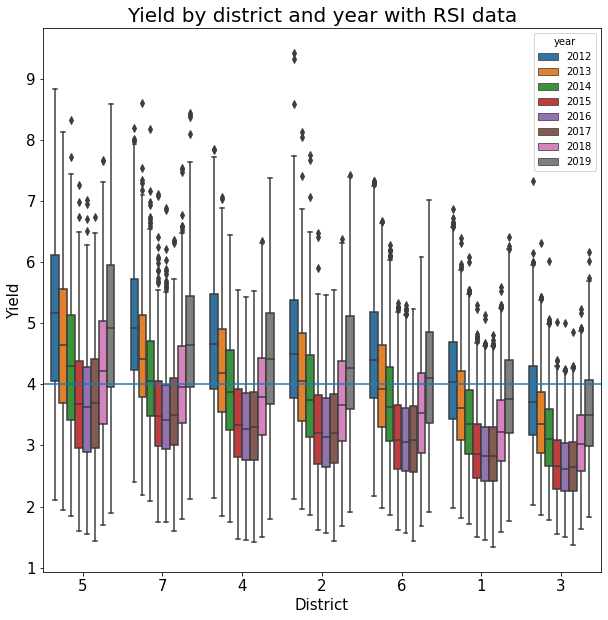

In [15]:
plt.figure(figsize=(10,10))
plot = sns.boxplot(data=full_data_s_no, x='postcode_zone', y='yield', hue='year', order=\
           full_data_s_no.groupby(by=['postcode_zone'])['yield'].median().sort_values(ascending=False).index)
plt.axhline(4)


plt.title('Yield by district and year with RSI data', fontsize=20)

plot.set_xlabel('District', fontsize=15)
plot.set_ylabel('Yield', fontsize=15)
plot.tick_params(labelsize=15)

plt.show()

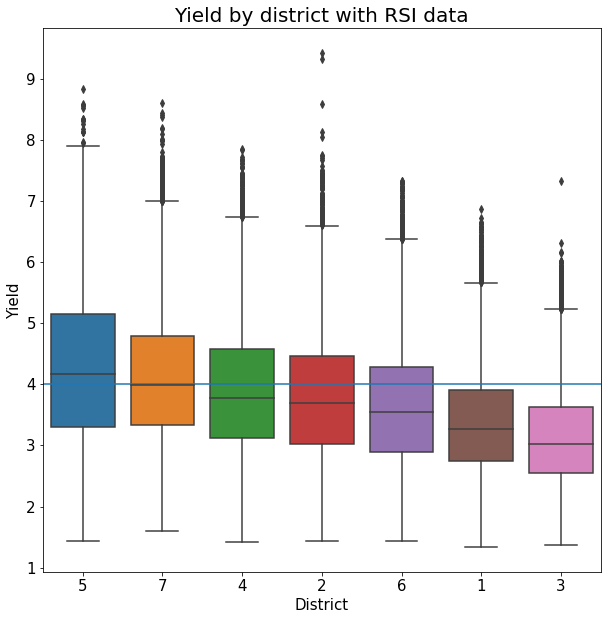

In [16]:
plt.figure(figsize=(10,10))
plot = sns.boxplot(data=full_data_s_no, x='postcode_zone', y='yield', order=\
           full_data_s_no.groupby(by=['postcode_zone'])['yield'].median().sort_values(ascending=False).index)
plt.axhline(4)


plt.title('Yield by district with RSI data', fontsize=20)

plot.set_xlabel('District', fontsize=15)
plot.set_ylabel('Yield', fontsize=15)
plot.tick_params(labelsize=15)

plt.show()

## Maps

In [31]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
import plotly.graph_objects as go
import plotly.express as px

In [18]:
post_codes = pd.read_csv('./extra_data/NW6 postcodes.csv', usecols=['Postcode', 'Latitude', 'Longitude']).rename(columns={'Postcode':'postcode'})
post_codes['postcode'] = post_codes['postcode'].str.replace(' ', '-')

In [19]:
data_map = post_codes.merge(full_data_s_no.groupby('postcode')['yield'].mean().reset_index(), on='postcode')
data_map['size'] = 1.5

In [20]:
data_map

,postcode,Latitude,Longitude,yield,size
0,NW6-1AA,51.552426,-0.193281,3.065898,1.5
1,NW6-1AB,51.552206,-0.194170,3.295986,1.5
2,NW6-1AD,51.552161,-0.194777,3.543902,1.5
3,NW6-1AE,51.552261,-0.195423,3.200802,1.5
4,NW6-1AG,51.552710,-0.195924,3.156918,1.5
...,...,...,...,...,...
845,NW6-7YR,51.544971,-0.214233,4.043858,1.5
846,NW6-7YS,51.545034,-0.214385,5.747912,1.5
847,NW6-7YT,51.545317,-0.215268,4.340025,1.5
848,NW6-7YU,51.545502,-0.215636,3.810923,1.5


In [24]:
data_map['district'] = data_map['postcode'].str[4]

In [30]:
api_key='pk.eyJ1IjoiYW5nZWxydXJlIiwiYSI6ImNrNDlwanBibjA2dGUzbG03bG5mdnRsemoifQ.3V0ozfRvWtNrwrZutvORUw'


px.set_mapbox_access_token(api_key)
carshare = px.data.carshare()
fig = px.scatter_mapbox(data_map, lat="Latitude", lon="Longitude", color="yield", text='district',size='size')


fig.update_layout(
    title = go.layout.Title(
            text = '2012 to 2019 predicted yields'
        ),
    height=1000,
    
    showlegend=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=api_key,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat= 51.545,
            lon=-0.2018
        ),
        pitch=0,
        zoom=13
    )
)
